In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
years = ['2014', '2015', '2016', '2017', '2018']
memberStatus = ['bronze', 'silver', 'gold','inactive']
N_MEMBERS = 1000
MEMBER_YEAR_DIST = [0.1, 0.1, 0.15, 0.30, 0.35]
MEMBER_STATUS_DIST = [0.5, 0.3, 0.1, 0.1]

NUM_EMAILS_SENT_WEEKLY = 3

behaviors = ['never_opens', 'constant_open_rate', 'increasing_open_rate', 'decreasing_open_rate']
MEMBER_BEHAVIOR_DIST = [0.2, 0.5, 0.1, 0.2]

In [10]:
memberYears = np.random.choice(years, N_MEMBERS, p = MEMBER_YEAR_DIST)
memberStats = np.random.choice(memberStatus, N_MEMBERS, MEMBER_STATUS_DIST)

(array([167.,   0., 280.,   0.,   0.,  90.,   0., 351.,   0., 112.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

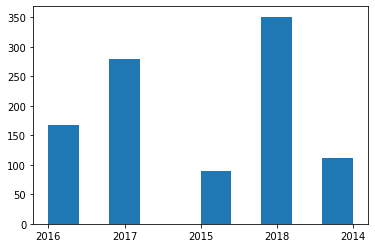

In [11]:
plt.hist(memberYears)

(array([268.,   0.,   0., 252.,   0.,   0., 237.,   0.,   0., 243.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

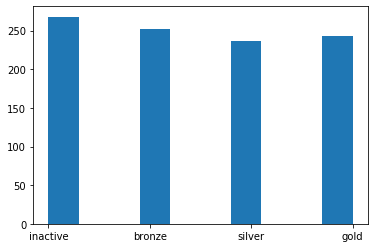

In [12]:
plt.hist(memberStats)

In [20]:
yearJoined = pd.DataFrame({'yearJoined': memberYears, 
                          'memberStats': memberStats})
yearJoined.head()

,yearJoined,memberStats
0,2016,inactive
1,2017,inactive
2,2015,bronze
3,2018,silver
4,2018,gold


In [59]:
def never_opens(period_rng):
    return []

def constant_open_rate(period_rng):
    p = np.random.uniform(0,1)
    num_opened = np.random.binomial(NUM_EMAILS_SENT_WEEKLY, p, len(period_rng))
    return num_opened

def increasing_open_rate(period_rng):
    fac = np.random.uniform(1.01, 1.30)
    return open_rate_with_factor_change(period_rng, fac)

def decreasing_open_rate(period_rng):
    fac = np.random.uniform(0.50, 0.99)
    return open_rate_with_factor_change(period_rng, fac)

def open_rate_with_factor_change(period_rng, fac):
    if len(period_rng) < 1:
        return []
    times = np.random.randint(0, len(period_rng), int(0.1*len(period_rng)))
    num_opened = np.zeros(len(period_rng))
    for prd in range(0, len(period_rng), 2):
        try:
            p = np.random.uniform(0,1)
            num_opened[prd:(prd+2)] = np.random.binomial(NUM_EMAILS_SENT_WEEKLY, p, 1)
            p = max(min(1, p*fac), 0)
        except:
            num_opened[prd] = np.random.binomial(NUM_EMAILS_SENT_WEEKLY, p, 1)
    for t in range(len(times)):
        num_opened[times[t]] = 0
    return num_opened

def random_weekly_time_delta():
    days_of_week = list(range(7))
    hours_of_day = list(range(11,23))
    minutes_of_hour = list(range(60))
    seconds_of_minute = list(range(60))

    return pd.Timedelta(str(np.random.choice(days_of_week)) + " days") + \
        pd.Timedelta(str(np.random.choice(hours_of_day)) + " hours") + \
        pd.Timedelta(str(np.random.choice(minutes_of_hour)) + " minutes") + \
        pd.Timedelta(str(np.random.choice(seconds_of_minute)) + " seconds")

def produce_donation(period_rng, member_behavior, num_emails, use_id, member_join_year):
    donation_amounts = np.array([0, 25, 50, 75, 100, 250, 500, 1000, 1500, 2000])
    
    member_has = np.random.choice(donation_amounts)
    
    email_fraction = num_emails/(NUM_EMAILS_SENT_WEEKLY*len(period_rng))
    
    member_gives = member_has*email_fraction
    
    member_gives_idx = np.where(member_gives >= donation_amounts)[0][-1]
    
    member_gives_idx = max(min(member_gives_idx, len(donation_amounts) - 2),1)
    
    num_times_gave = np.random.poisson(2)*(2018 - member_join_year)
    
    times = np.random.randint(0, len(period_rng), num_times_gave)
    
    dons = pd.DataFrame({'member'   : [],
                         'amount'   : [], 
                         'timestamp': []})
    
    for n in range(num_times_gave):
        donation = donation_amounts[member_gives_idx + np.random.binomial(1, 0.3)]
        ts = str(period_rng[times[n]].start_time + random_weekly_time_delta())
        dons = dons.append(pd.DataFrame(
                        {'member'   : [use_id],
                         'amount'   : [donation], 
                         'timestamp': [ts]}))
    
    if dons.shape[0] > 0:
        dons = dons[dons.amount != 0]
        
    return dons

(array([261.,   0.,   0., 248.,   0.,   0., 252.,   0.,   0., 239.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

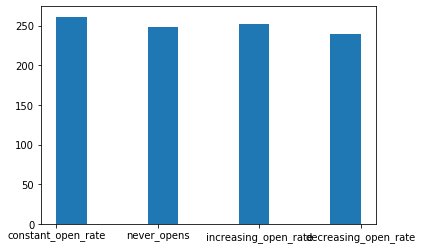

In [16]:
member_behaviors = np.random.choice(behaviors, N_MEMBERS, MEMBER_BEHAVIOR_DIST)
plt.hist(member_behaviors)

In [61]:
rng = pd.period_range('2015-02-14', '2018-06-01', freq='W')
emails = pd.DataFrame({'member': [],
                     'week': [],
                     'emailsOpened': []})
donations = pd.DataFrame({'member' :[],
                       'amount': [],
                       'timestamp': []})

for idx in range(yearJoined.shape[0]):
    join_date = pd.Timestamp(yearJoined.iloc[idx].yearJoined) + \
    pd.Timedelta(str(np.random.randint(0, 365)) + ' days')
    
    join_date = min(join_date, pd.Timestamp('2018-06-01'))
    _rng = rng.to_timestamp()
    member_rng = rng[_rng > join_date]
    
    if len(member_rng) < 1:
        continue
    
    info = eval(member_behaviors[idx])(member_rng)
    if len(info) == len(member_rng):
        emails = emails.append(pd.DataFrame({'member': [idx]*len(info),
                                             'week': [str(r.start_time) for r in member_rng] ,
                                             'emailsOpened': info}))
        donations = donations.append(produce_donation(member_rng, member_behaviors[idx],
                                                     sum(info), idx, join_date.year))
        
        

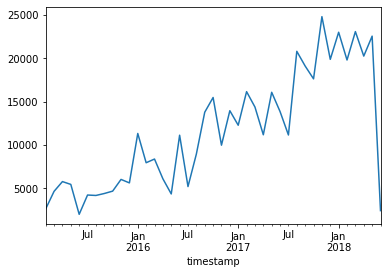

In [64]:
donations = donations.set_index(pd.to_datetime(donations.timestamp))
donations.sort_index(inplace=True)
donations.groupby(pd.Grouper(freq='M')).amount.sum().plot()